#Ecuación Korteweg-de-Vries(KdV)


La ecuación KdV es una ecuación diferencial en derivadas parciales que sirve como modelo de, entre otras cosas, aguas poco profundas. Fue por primera vez introducida por Boussinesq en 1877 como una nota y redescubierta por Diederik Korteweg y Gustav de Vries en 1895. Esta está dada por la expresión,

$$ \partial_t u + u u_x + \beta \, u_{xxx} = 0 $$



$\bf a)$ Pruebe analíticamente la conservación del momento $P = \int u dx$ y  de la energía $E = \int u^2 dx$.

$\bf b)$ Notando que el estado estacionario es con $u$ constante, calcule la relación de dispersión de ondas linealizando. ¿Qué tipo de ondas son las que encuentra?  


$\bf c)$ Busque la solución de ondas viajeras $u(x-vt) = u (y)$. Para eso, primero note que $u_t = -v u'$. Escriba el sistema como una ecuación de segundo orden integrando (Note que la presencia de una simetría $v \rightarrow v + w$ antes de integrar permite anular la constante de integración), realice una analogía con una ecuación del movimiento como las que conoce de mecánica newtoniana ($\ddot{x} = - \frac{dV}{dx}$, interprete el tiempo como $x$ y el espacio como $u$) e interprete (grafique el potencial para hacerlo). Discuta la existencia de un único soliton y de un trén de solitones.

$\bf d)$ Escriba un integrador con método pseudoespectral para la ecuación KdV usando Runge-Kutta de orden 2 midpoint para el paso temporal. Hágalo en un recinto de tamaño $2  \ pi$ con condiciones de contorno periódicas y $N = 128$ puntos de grilla. Note que el término $\beta u_{xxx}$, en caso ser dominante exige $dt < \frac{\Delta x^3}{\beta}$. (puede usar un N mayor cuidando el dt para que se cumpla la condición de estabilidad)

$\bf e)$ Sabiendo que la expresión de un solitón está dada por:

$$ u(x,t) = 3 \, v \, \text{cosh}^{-2} \left[ \sqrt{\frac{v}{4 \beta}} (x  - v t) \right]$$

coloque un solitón como condición inicial, calcule su velocidad en función del tiempo y compare con lo que espera. Escriba una condición de dos solitones, uno rápido y uno lento. ¿Se afectan el uno al otro?

$\bf f)$ Del método de scattering inverso se encuentra que usando la transformación

$$ u  = - 6 \beta \left( \lambda + \frac{\psi_{xx}}{\psi}\right)$$

entonces $u$ será una solución de KdV si $\psi$ es solución de la ecuación de Schrödinger con un potencial $V = \frac{-u}{6 \beta}$. Dado el potencial, los lugares donde hayan pozos representan la existencia de estados ligados y resultarán en la emisión de solitones.

Elija una condición inicial, grafique el potencial y vea cómo se emiten solitones desde la zona esperada. Chequee las cantidades conservadas del comienzo.


(Sugerencia: Use $\beta = 0.022$ y $dt = 5e-5$ e integre por tiempo muy largos )

$\bf a)$ Multiplicando toda la ecuaicón por u tenemos que:
$$ \frac{d}{dt} \left( \frac{u^2}{2} \right) + u \partial_x \left( \frac{u^2}{2} \right) + u \beta \partial_x u_{xx} = 0 $$
que se puede reescribir como
$$\frac{d}{dt} \left( \frac{u^2}{2} \right) = -\frac{1}{3} \partial_x u^3 - \beta u \partial_x u_{xx} = \partial_x \left[ - \frac{u^3}{3} - \beta \left( u u_{xx} - \frac{u_x^2}{2} \right) \right]$$
que integrando en un recinto con condiciones de contorno razonables nos da que
$$ \frac{d}{dt} E = 0 $$. \\
Para el momento partimos de la ecuación KdV y reescribimos:
$$ \partial_t u = - \partial_x \left[ \frac{u^2}{2} + \beta u_{xx} \right] $$
que integrando en un recinto con condiciones de contorno razonables nos da que
$$ \frac{d}{dt} P = 0 $$

$\bf b)$ Como la ecuación diferencial involucra solamente derivadas parciales, es claro que una constante (en el espacio y el tiempo) es una solución trivial (0=0). Proponemos entonces una solución de la forma $u(x,t) = u_0 + \delta u(x,t)$ con $\frac{\delta u}{u_0} << 1 \ \forall t$. Entonces, reemplazando en la ecuación:
$$\partial_t \delta u + \left( u_o + \delta u \right) \partial_x u + \partial_{xxx} \delta u = 0$$
Proponiendo ahora $\delta u = A \sin \left( kx - \omega t \right)$ tenemos que
$$\omega = u_0 k - \beta k^3 $$
que es la relación de dispersión buscada.

$\bf c)$ Usando el ansatz de ondas viajeras $u = u(x - vt) := u(y)$ para la ecuación tenemos que
$$-v u' + u u' + \beta u''' = 0$$
Que se puede reescribir como
$$\frac{d}{dy} \left( -v u + \frac{u^2}{2} + \beta u'' \right) = 0$$
Por la simetría $v \to v + w$ con $w = cte$ podemos escribir una ecuación equivalente:
$$\beta u'' = \partial_u \left( v \frac{u^2}{2} - \frac{u^3}{6} \right)$$
En analogía con la ecuación de Newton, podemos pensar a esta ecuación diferencial como la que rige la dinámica de una partícula de masa $\beta$ en la posición $u$ a tiempo $y$ en un potencial  definido por $F = - \partial_u V$ con $V = -v \frac{u^2}{2} + \frac{u^3}{6}$, con una raiz doble en $u=0$ y una simple en $u=3v$.

Del gráfico más abajo se observa que el potencial solo puede tomar valores $<=0$ con $u \in [0; 3v]$, ya que de lo contrario las velocidades no presentarían un comportamiento oscilatorio, sino que se obtendrían soluciones con una velocidad infinita.

En $u=3v$ se obtiene una solución de un solo solitón. En cambio, en el mínimo, $u=2v$ hay un tren de infinitos solitones.


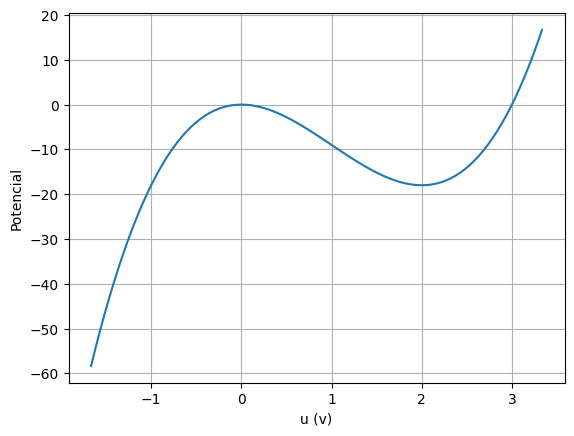

In [ ]:
# Grafico del potencial
import matplotlib.pyplot as plt
import numpy as np

u = np.linspace(-5, 10, 100)
v = 3
pot = -v/2 * u**2 + u**3/6

plt.plot(u/v, pot)
plt.xlabel('u (v)')
plt.ylabel('Potencial')
plt.grid()

$\bf d)$ Escriba un integrador con método pseudoespectral para la ecuación KdV usando Runge-Kutta de orden 2 midpoint para el paso temporal. Hágalo en un recinto de tamaño $2  \ pi$ con condiciones de contorno periódicas y $N = 128$ puntos de grilla. Note que el término $\beta u_{xxx}$, en caso ser dominante exige $dt < \frac{\Delta x^3}{\beta}$. (puede usar un N mayor cuidando el dt para que se cumpla la condición de estabilidad)

In [ ]:
# d

from matplotlib import rc,animation
from IPython.display import HTML
rc('animation',html='html5');
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np

def evol(u, i_t, k, dt):
    # Evoluciona en el tiempo la PDE usando el método pseudoespectral y Runge-Kutta de segundo orden
    fu  = np.fft.rfft(u)     # vaya al espacio de Fourier
    fut = fu
    for ord in [2,1]:       # Bucle para el Runge-Kutta
        D   = dt/ord
        fux = compute_advection(fu, k)
        fu  = fut + D*(-fux - beta * (1j*k)**3 * fu)
        fu[int(N/3):] = 0   # Dealiasing (eliminemos modos espúreos!)
    out = np.fft.irfft(fu)  #Vuelva del espacio de Fourier
    return out

def compute_advection(f, k):
    # Calcula v*vx usando el método pseudoespectral y devuelve el resultado en el espacio Fourier
    fx  = 1j*k*f                      # derivamos
    v   = np.fft.irfft(f)            # vuelva para poder multiplicar!
    vx  = np.fft.irfft(fx)                        # eso de arriba
    v   = v*vx
    out = np.fft.rfft(v)
    return out

$\bf e)$ Sabiendo que la expresión de un solitón está dada por:

$$ u(x,t) = 3 \, v \, \text{cosh}^{-2} \left[ \sqrt{\frac{v}{4 \beta}} (x  - v t) \right]$$

coloque un solitón como condición inicial, calcule su velocidad en función del tiempo y compare con lo que espera. Escriba una condición de dos solitones, uno rápido y uno lento. ¿Se afectan el uno al otro?

In [ ]:
# e

# Definimos los puntos en el espacio real y los parametros del problema
N     = 128
dt    = 1e-5
tf    = 4
times = np.arange(0, tf, dt)      # Tiempo
steps = len(times)

xf    = 2*np.pi                           # Pasos temporales
x     = np.linspace(0, xf, N, endpoint=False)  # Coordenada espacial en [0,2*pi)
k     = np.arange(0,N/2+1)                       # Números de onda ordenados como en la FFT
beta  = 0.022
v     = xf/tf/3

# Condiciones iniciales
out = np.ones((N, steps))

# Soliton
soliton = 3 * v * np.cosh(np.sqrt(v/(4*beta)) * (x-np.pi))**(-2)

out[:, 0] = soliton

# Integramos la evolución temporal
for i_t in range(steps - 1):
    out[:,i_t+1] = evol(u=out[:,i_t], i_t=i_t, k=k, dt=dt)


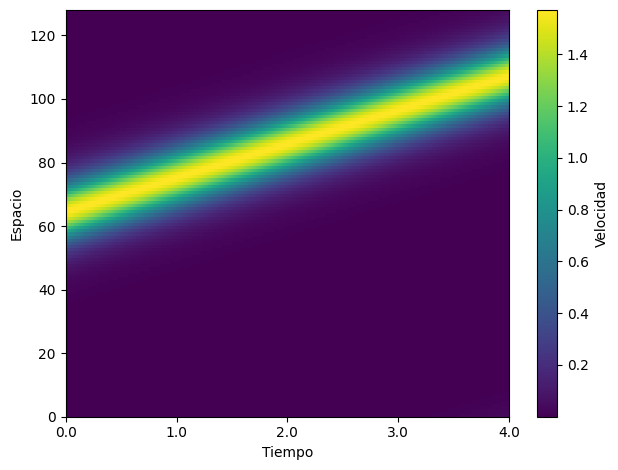

In [ ]:
# Plot
fig = plt.figure()

plt.pcolormesh(out);
xticks_idx = np.linspace(0, tf/dt -1, 5).astype(int)
plt.xticks(xticks_idx, np.round(times[xticks_idx], 0))
plt.xlabel('Tiempo')
plt.ylabel('Espacio')
plt.colorbar().set_label('Velocidad')

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
##Ejemplo de codigo para hacer animaciones, ver la documentación para más detalles

fig, ax = plt.subplots()
plt.xlabel('Espacio')
plt.ylabel('Velocidad')
plt.close()
ln, = ax.plot([], [])

def init():
    ax.set_xlim(0, x[-1])
    ax.set_ylim(0, np.max(out)+0.5)
    return ln,

def update(frame):
    ln.set_data(x, out[:, frame])
    return ln,

ani = FuncAnimation(fig, update, frames=np.arange(0, steps, 10000),
                    init_func=init, blit=True)
ani

En la animación se ve claramente una solución que se propaga con velocidad constante sin deformarse. Este es el buscado solitón. Muy bonito.
La condición inicial para esta evolución es muy particular. Cualquier otra va a dar lugar a un tren de solitones.

In [ ]:
# 2 solitones

# Definimos los puntos en el espacio real y los parametros del problema
N     = 128
dt    = 1e-5
tf    = 4
times = np.arange(0, tf, dt)      # Tiempo
steps = len(times)

xf    = 2*np.pi                           # Pasos temporales
x     = np.linspace(0, xf, N, endpoint=False)  # Coordenada espacial en [0,2*pi)
k     = np.arange(0,N/2+1)                       # Números de onda ordenados como en la FFT
beta  = 0.022
v     = xf/tf/3

# Condiciones iniciales
out2 = np.ones((N, steps))

v1     = xf/6
v2     = xf/3

# Soliton
soliton1 = 3 * v1 * np.cosh(np.sqrt(v1/(4*beta)) * (x-np.pi))**(-2)
soliton2 = 3 * v2 * np.cosh(np.sqrt(v2/(4*beta)) * (x-np.pi/2))**(-2)


out2[:, 0] = soliton1 + soliton2

# Integramos la evolución temporal
for i_t in range(steps - 1):
    out2[:,i_t+1] = evol(u=out2[:,i_t], i_t=i_t, k=k, dt=dt)

In [ ]:
##Ejemplo de codigo para hacer animaciones, ver la documentación para más detalles

fig, ax = plt.subplots()
plt.xlabel('Espacio')
plt.ylabel('Velocidad')
plt.close()
ln, = ax.plot([], [])

def init():
    ax.set_xlim(0, x[-1])
    ax.set_ylim(0, np.max(out2)+0.5)
    return ln,

def update(frame):
    ln.set_data(x, out2[:, frame])
    return ln,

ani = FuncAnimation(fig, update, frames=np.arange(0, steps, 5000),
                    init_func=init, blit=True)
ani

En la animación (y más claramente en el gráfico de abajo) se observa que hay un intercambio de momento entre los solitones, completamente análogo al scattering de partículas. Se ve que las crestas no llegan a solaparse y que la cresta de la derecha evoluciona a un solitón con la velocidad de la cresta de la izquierda y con su amplitud. Se nota un retraso en las trayectorias de los solitones en el momento del scattering que se manifiesta en la desviación de las rectas que trazan (ver gráfico de abajo).

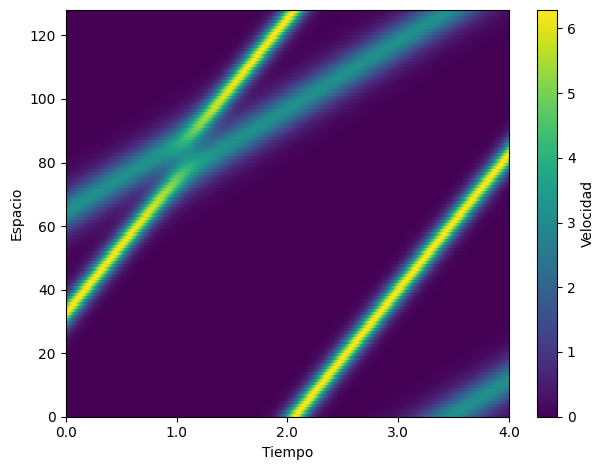

In [ ]:
# Plot
fig = plt.figure()

plt.pcolormesh(out2);
xticks_idx = np.linspace(0, tf/dt -1, 5).astype(int)
plt.xticks(xticks_idx, np.round(times[xticks_idx], 0))
plt.xlabel('Tiempo')
plt.ylabel('Espacio')
plt.colorbar().set_label('Velocidad')

plt.tight_layout()
plt.show()
plt.close()

$\bf f)$ Del método de scattering inverso se encuentra que usando la transformación

$$ u  = - 6 \beta \left( \lambda + \frac{\psi_{xx}}{\psi}\right)$$

entonces $u$ será una solución de KdV si $\psi$ es solución de la ecuación de Schrödinger con un potencial $V = \frac{-u}{6 \beta}$. Dado el potencial, los lugares donde hayan pozos representan la existencia de estados ligados y resultarán en la emisión de solitones.

Elija una condición inicial, grafique el potencial y vea cómo se emiten solitones desde la zona esperada. Chequee las cantidades conservadas del comienzo.


(Sugerencia: Use $\beta = 0.022$ y $dt = 5e-5$ e integre por tiempo muy largos )

In [ ]:
# f

# Definimos los puntos en el espacio real y los parametros del problema
N     = 128
dt    = 1e-5
tf    = 4
times = np.arange(0, tf, dt)      # Tiempo
steps = len(times)

xf    = 2*np.pi                           # Pasos temporales
x     = np.linspace(0, xf, N, endpoint=False)  # Coordenada espacial en [0,2*pi)
k     = np.arange(0,N/2+1)                       # Números de onda ordenados como en la FFT
beta  = 0.022
v     = xf/tf/3

# Condiciones iniciales
outf = np.ones((N, steps))
sin = np.sin(x)
outf[:, 0] = sin
potencial = -sin/6/beta

# Integramos la evolución temporal
for i_t in range(steps - 1):
    outf[:,i_t+1] = evol(u=outf[:,i_t], i_t=i_t, k=k, dt=dt)


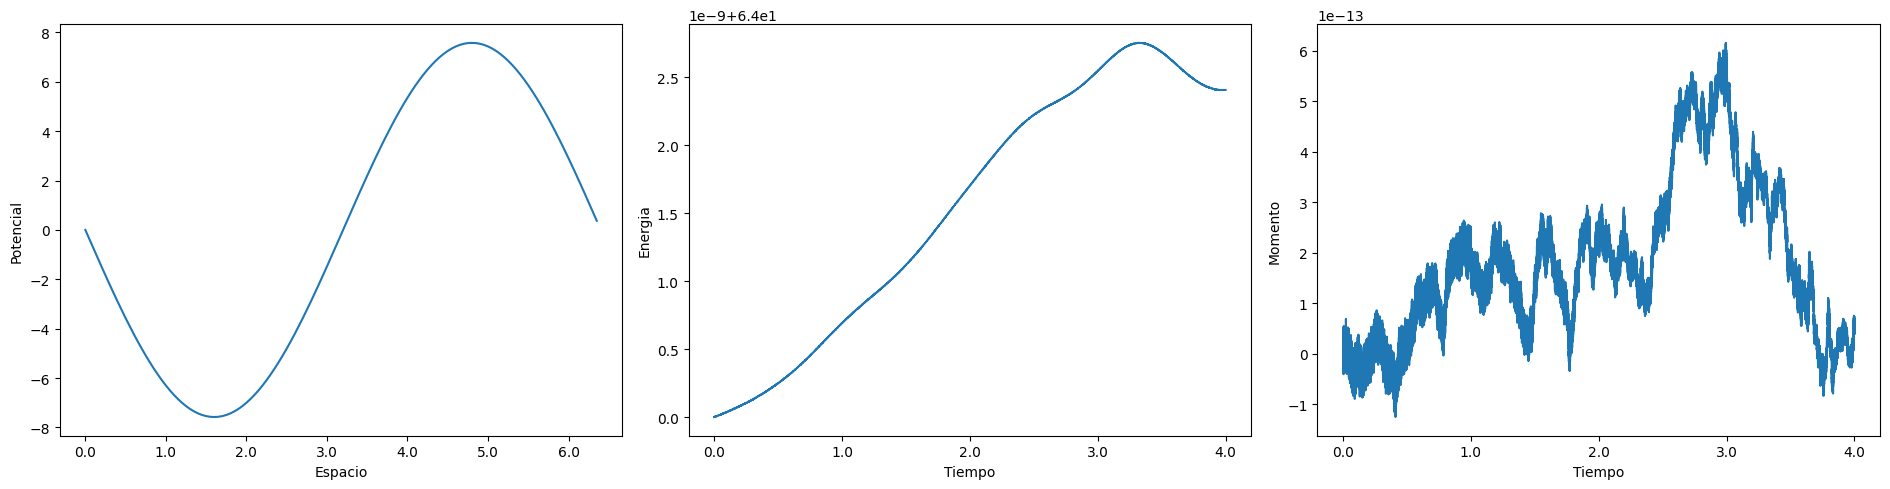

In [ ]:
energia = np.sum(outf**2, axis=0)
momento = np.sum(outf, axis=0)

fig, axs = plt.subplots(ncols=3, figsize=(19, 5))

axs[0].plot(potencial)
xticks_idx = axs[0].get_xticks()[1:-1].astype(int)
axs[0].set_xticks(xticks_idx, np.round(x[xticks_idx], 0))
axs[0].set_ylabel('Potencial')
axs[0].set_xlabel('Espacio');


axs[1].plot(energia)
xticks_idx = np.linspace(0, tf/dt -1, 5).astype(int)
axs[1].set_xticks(xticks_idx, np.round(times[xticks_idx], 0))
axs[1].set_ylabel('Energia')
axs[1].set_xlabel('Tiempo');

axs[2].plot(momento)
xticks_idx = np.linspace(0, tf/dt -1, 5).astype(int)
axs[2].set_xticks(xticks_idx, np.round(times[xticks_idx], 0))
axs[2].set_ylabel('Momento')
axs[2].set_xlabel('Tiempo');

fig.tight_layout()

Las cantidades energía y momento se conservan en al menos 9 órdenes de magnitud, lo que da la pauta de una integración correcta.

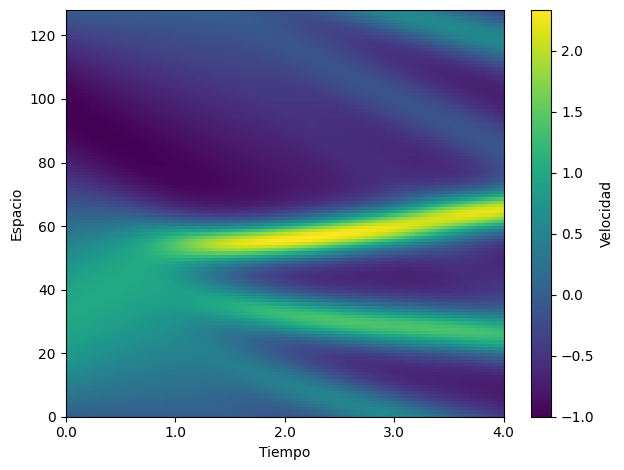

In [ ]:
# Plot
fig = plt.figure()

plt.pcolormesh(outf);
xticks_idx = np.linspace(0, tf/dt -1, 5).astype(int)
plt.xticks(xticks_idx, np.round(times[xticks_idx], 0))
plt.xlabel('Tiempo')
plt.ylabel('Espacio')
plt.colorbar().set_label('Velocidad')

plt.tight_layout()
plt.show()
plt.close()

En el gráfico anterior se observa cómo, del mínimo del potencial (máximo de la velocidad inicial) se desprenden varios solitones con distintas amplitudes, velocidades y direcciones.

In [ ]:
fig = plt.figure()

fig, ax = plt.subplots()
plt.close()
ln, = ax.plot([], [])

def init():
    ax.set_xlabel('Espacio')
    ax.set_ylabel('Velocidad')
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(np.min(outf)-0.5, np.max(outf)+0.5)
    return ln,

def update(frame):
    ln.set_data(x, outf[:, frame])
    return ln,

ani = FuncAnimation(fig, update, frames=np.arange(0, steps, 5000),
                    init_func=init, blit=True)
ani

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

im = axs[0].pcolormesh(outf);
xticks_idx = np.linspace(0, tf/dt -1, 5).astype(int)
axs[0].set_xticks(xticks_idx, np.round(times[xticks_idx], 0))
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Espacio')
plt.colorbar(im, cax=axs[0]).set_label('Velocidad')

plt.close()
ln, = axs[1].plot([], [])

def init():
    axs[1].set_xlabel('Espacio')
    axs[1].set_ylabel('Velocidad')
    axs[1].set_xlim(x[0], x[-1])
    axs[1].set_ylim(np.min(outf)-0.5, np.max(outf)+0.5)
    return ln,

def update(frame):
    ln.set_data(x, outf[:, frame])
    return ln,

ani = FuncAnimation(fig, update, frames=np.arange(0, steps, 5000),
                    init_func=init, blit=True)
ani

pipe:: Immediate exit requested
Error writing trailer of /tmp/tmphk0ld3yz/temp.m4v: Immediate exit requested



CalledProcessError: ignored